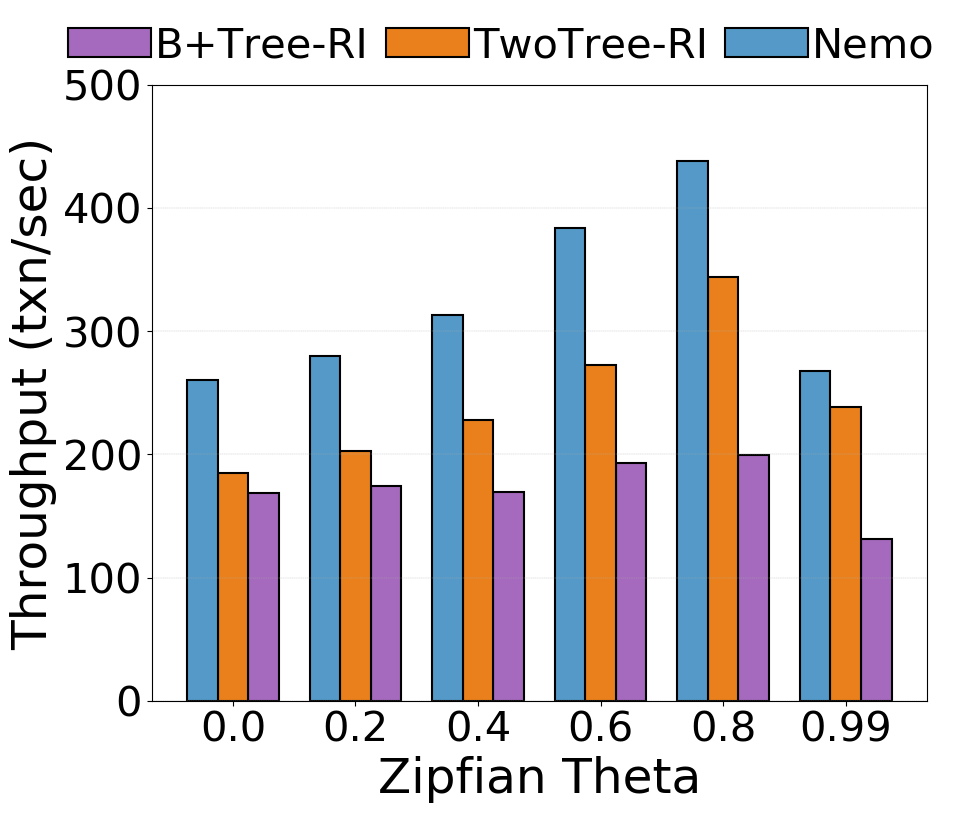

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from process_helper import select_color_idx
import matplotlib.colors as mcolors

txtsize=35
ticksize=30

color_indices, line_colors = select_color_idx(4)
lw = 1.5
bonsai_c = line_colors["BLUE"]
page_retain_c = line_colors["PURPLE"]
page_evict_c = "#78c679"
tt_retain_c =  "#ea801c"
tt_evict_c = "#54a1a1"


def shift(color, mix, alpha):
    a = mcolors.to_rgb(color)
    b = mcolors.to_rgb(mix)
    return mcolors.to_hex([(1 - alpha) * x + alpha * y for x, y in zip(a, b)])

page_evict_c = shift(page_retain_c, line_colors["GREEN"], 0.25)  # pull purple toward azure
tt_evict_c   = shift(tt_retain_c, line_colors["GREEN"], 0.25)   # pull orange toward warm yellow


bonsai_label = "Nemo"
page_idx_label = "B+Tree-RI"
page_idx_evict_label = "B+Tree-EI" 
tt_idx_label = "TwoTree-RI"
tt_idx_evict_label = "TwoTree-EI"


datadir = "../../output/"
exp_page = "exp_point_10g_page_unihotspot_rw"
exp_page_idx_evict = "exp_point_10g_page_unihotspot_idx_evict_rw"
exp_tuple = "exp_point_10g_tuple_unihotspot_rw"
# exp_remote = "different_settings/" + "microbench_zipf_10g_fanout18.out"
exp_twotree = "exp_point_10g_twotree_unihotspot_rw"
exp_twotree_idx_evict = "exp_point_10g_twotree_unihotspot_idx_evict_rw"
x_dimension = "zipf_theta_"



# Load and prepare the data
data_page = [json.loads(line) for line in open(datadir + exp_page + ".txt")]
df_page = pd.DataFrame().from_records(data_page).sort_values(by=x_dimension)

data_page_idx_evict = [json.loads(line) for line in open(datadir + exp_page_idx_evict + ".txt")]
df_page_idx_evict = pd.DataFrame().from_records(data_page_idx_evict).sort_values(by=x_dimension)

data_tuple = [json.loads(line) for line in open(datadir + exp_tuple + ".txt")]
df_tuple = pd.DataFrame().from_records(data_tuple).sort_values(by=x_dimension)

data_tt = [json.loads(line) for line in open(datadir + exp_twotree + ".txt")]
df_tt = pd.DataFrame().from_records(data_tt).sort_values(by=x_dimension)

data_tt_idx_evict = [json.loads(line) for line in open(datadir + exp_twotree_idx_evict + ".txt")]
df_tt_idx_evict = pd.DataFrame().from_records(data_tt_idx_evict)
df_tt_idx_evict = df_tt_idx_evict.sort_values(by=x_dimension)

dimension = "throughput_txn_per_sec"

bar_width = 0.25
indices = np.arange(len(df_page))
offset = bar_width


fig, ax1 = plt.subplots(figsize=(10, 8))

# Bar chart for the primary data
# ax1.bar(indices + offset * 2, df_page_idx_evict[dimension], bar_width, label=page_idx_evict_label, color=page_evict_c)
ax1.bar(indices + offset, df_page[dimension], bar_width,  edgecolor='black', linewidth=lw, label=page_idx_label, color=page_retain_c)
# ax1.bar(indices , df_tt_idx_evict[dimension], bar_width, label=tt_idx_evict_label, color=tt_evict_c)
ax1.bar(indices, df_tt[dimension], bar_width,  edgecolor='black', linewidth=lw, label=tt_idx_label, color=tt_retain_c)
ax1.bar(indices - offset, df_tuple[dimension], bar_width,  edgecolor='black', linewidth=lw, label=bonsai_label, color=bonsai_c)

ax1.set_xticks(indices)
ax1.set_xticklabels(df_page[x_dimension])
# ax1.set_yscale('log')
ax1.set_ylim(0, 500)

ax1.tick_params(axis='both', labelsize=ticksize)
ax1.set_ylabel("Throughput (txn/sec)", fontsize=txtsize)
ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)
ax1.grid(axis='y', linestyle='--', linewidth=0.25)
legend = ax1.legend(fontsize=ticksize, bbox_to_anchor=(-0.13, 1.02, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)

plt.savefig("/home/hippo/Nemo/figures/ev1-skew-rw-tps.pdf",bbox_inches='tight')

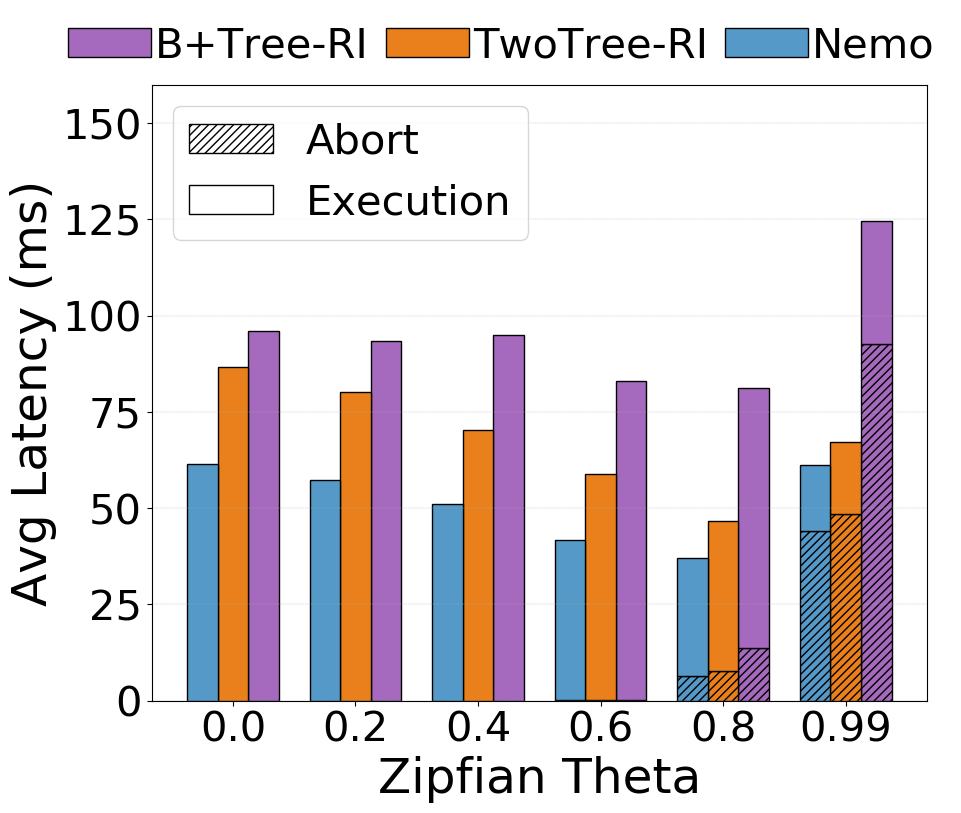

In [ ]:
from matplotlib.patches import Patch
# fig, ax1 = plt.subplots(figsize=(12, 9.6))
fig, ax1 = plt.subplots(figsize=(10, 8))
offset = bar_width
# ax1 = fig.add_subplot(1, 1, 1)
index = np.arange(len(df_tuple["g_total_buf_sz"])) - offset * 3
indices = np.arange(len(df_page))
dimension = "avg_sum_txn_latency (us)"
cur_label="Page"
cur_color=page_retain_c
cur_df = df_page 
cur_exec_time = cur_df["avg_sum_rw_txn_latency (us)"] - cur_df["avg_rw_abort_time_ (us)"]
cur_idx = 2
barloc = indices + offset

ax1.bar(barloc, 
        cur_df["avg_rw_abort_time_ (us)"]/1000.0 , width=bar_width,edgecolor='black', hatch='////',
        color=cur_color,
        label=cur_label+"-Abort-Time")
ax1.bar(barloc, 
        cur_exec_time/1000.0, bottom=cur_df["avg_rw_abort_time_ (us)"]/1000.0, width=bar_width, edgecolor='black',
        color=cur_color,
        label=cur_label+"-Execution-Time")




cur_label="TwoTree"
cur_color=tt_retain_c
cur_df = df_tt 
# cur_exec_time = cur_df["avg_sum_rw_txn_latency (us)"] - cur_df["avg_log_time_ (us)"] - cur_df["avg_rw_abort_time_ (us)"] - cur_df["avg_cc_time_ (us)"] 
cur_exec_time = cur_df["avg_sum_rw_txn_latency (us)"] - cur_df["avg_rw_abort_time_ (us)"]
cur_idx = 4
barloc = indices

ax1.bar(barloc, 
        cur_df["avg_rw_abort_time_ (us)"]/1000.0 , width=bar_width,edgecolor='black', hatch='////',
        color=cur_color,
        label=cur_label+"-Abort-Time")
ax1.bar(barloc, 
        cur_exec_time/1000.0, bottom=cur_df["avg_rw_abort_time_ (us)"]/1000.0, width=bar_width, edgecolor='black',
        color=cur_color,
        label=cur_label+"-Execution-Time")


cur_label="Bonsai"
cur_color=bonsai_c
cur_df = df_tuple 
# cur_exec_time = cur_df["avg_sum_rw_txn_latency (us)"] - cur_df["avg_log_time_ (us)"] - cur_df["avg_rw_abort_time_ (us)"] - cur_df["avg_cc_time_ (us)"] 
cur_exec_time = cur_df["avg_sum_rw_txn_latency (us)"] - cur_df["avg_rw_abort_time_ (us)"]
cur_idx = 1
barloc = indices - offset 
ax1.bar(barloc, 
        cur_df["avg_rw_abort_time_ (us)"]/1000.0 , width=bar_width,edgecolor='black', hatch='////',
        color=cur_color,
        label=cur_label+"-Abort-Time")
ax1.bar(barloc, 
        cur_exec_time/1000.0, bottom=cur_df["avg_rw_abort_time_ (us)"]/1000.0, width=bar_width, edgecolor='black',
        color=cur_color,
        label=cur_label+"-Execution-Time")

location = "best"
# ax1.legend(loc=location, frameon=False)
ax1.set_ylabel("Avg Latency (ms)", fontsize=txtsize)
ax1.grid(axis = 'y', linestyle = '--', linewidth = 0.25)
ax1.set_xlabel("Zipfian Theta", fontsize=txtsize)


ax1.set_xticks(indices)
ax1.set_xticklabels(df_page[x_dimension])
ax1.tick_params(axis='both', labelsize=ticksize)

bar_labels = [ page_idx_label, tt_idx_label, bonsai_label]  # Bars within each group


# Colors for the bars (categories)
colors = [page_retain_c, tt_retain_c,bonsai_c]


subcategories = ['Abort', 'Execution']  # Stacks within each bar

# Hatches for the subcategories
hatches = ['////', '']

# Create custom patches for the subcategories
hatch_patches = [Patch(facecolor='white', edgecolor='black', hatch=h, label=sc)
                 for h, sc in zip(hatches, subcategories)]

# Create custom patches for the categories
color_patches = [Patch(facecolor=c, edgecolor='black', label=bl)
                 for c, bl in zip(colors, bar_labels)]
ax1.set_ylim(0, 160)

# Create legends
subcat_legend = plt.legend(ncol=1, handles=hatch_patches,fontsize=ticksize, loc="upper left",)
ax1.add_artist(subcat_legend)  # Add the first legend manually to keep it when adding the second
legend = plt.legend(handles=color_patches, fontsize=ticksize, bbox_to_anchor=(-0.13, 1.02, 1.1, .102), loc=2,
           ncol=3,borderaxespad=0., frameon=False,columnspacing=0.4, handletextpad=0.1)

plt.savefig("/home/hippo/Nemo/figures/ev1-skew-rw-analysis-latency-breakdown.pdf",bbox_inches='tight')
